# 모델링

## train_test_split

In [1]:
import pandas as pd
df_fin = pd.read_csv('전처리_final.csv')

In [2]:
audi = pd.read_csv('Movie_raw.csv')

In [3]:
df_fin['Target'] = audi['audiAcc']

In [4]:
df_fin

,dist_rank,genre_rank,direct_rank,네이버_기대지수,star_buzz,movie_buzz_naver,google_trend,Target
0,4,5,67,1274.0,1629,22,773.0,723414.0
1,8,13,67,3838.0,581,19,387.0,351276.0
2,2,13,41,494.0,943,30,616.0,336822.0
3,8,13,94,162.0,111,6,0.0,7443.0
4,3,13,67,800.0,335,5,1674.0,24823.0
...,...,...,...,...,...,...,...,...
570,3,13,5,13693.0,1987,219,947.0,7759473.0
571,2,13,72,10731.0,1196,124,886.0,955175.0
572,4,1,5,4941.0,1413,379,0.0,8646758.0
573,7,8,100,247.0,147,25,459.0,1660.0


In [5]:
y = df_fin['Target']
x = df_fin.drop('Target', axis=1)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=100)

In [7]:
# 정규화, 정규화하는 것이 더 좋은 결과를 낳음
from sklearn.preprocessing import StandardScaler
 
sc = StandardScaler()
sc.fit(X_train)
 
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
#-*- coding: utf-8 -*-
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.layers import Dropout, Dense
from keras.callbacks import ModelCheckpoint,EarlyStopping
import tensorflow as tf
import os
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.callbacks import *
from sklearn.metrics import accuracy_score

In [238]:
# 딥러닝 모델 선언
model = Sequential()
model.add(Dense(8, input_dim=7, activation='elu'))  # 입력층
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(16, activation='elu'))      # 은닉층1 
#model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(32, activation='elu'))      # 은닉층1
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(32, activation='elu'))      # 은닉층1
model.add(Dropout(0.2))
#model.add(BatchNormalization())
model.add(Dense(32, activation='elu'))
model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(Dense(8, activation='elu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(Dense(8, activation='elu'))
#model.add(Dropout(0.2))
#model.add(BatchNormalization())
#model.add(Dense(8, activation='elu'))
#model.add(BatchNormalization())
#model.add(Dropout(0.2))
#model.add(Dense(8, activation='elu'))
#model.add(BatchNormalization())
#model.add(Dense(8, activation='elu'))
#model.add(Dense(4, activation='elu'))
model.add(Dense(1))# 출력층
# 선형 회귀는 마지막에 참과 거짓을 구분할 필요가 없음. 출력층에 활성화 함수를 지정할 필요도 없음

model.compile(loss='mean_absolute_error',
              optimizer='rmsprop', 
              metrics=['mae'])

In [239]:
# 모델 저장 폴더 만들기
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
    os.mkdir(MODEL_DIR)

modelpath = "./model/{epoch:02d}-{val_loss:.4f}.hdf5"

# 모델 업데이트 및 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_mae', verbose=0, save_best_only=True, mode='min')
# 콜백함수
reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=100, mode='min')

# 학습 자동 중단 설정
early_stopping_callback = EarlyStopping(monitor='val_mae', patience=130, mode='min')

In [240]:
history = model.fit(X_train, y_train, validation_split=0.3, epochs=2000, batch_size=64, verbose=1, callbacks=[early_stopping_callback,checkpointer,reduce_lr])
print("\nmodel mae: %.4f" % (model.evaluate(X_test, y_test)[1]))  

Epoch 1/2000
5/5 [==============================] - 1s 41ms/step - loss: 1360968.7500 - mae: 1360968.7500 - val_loss: 1439345.2500 - val_mae: 1439345.2500 - lr: 0.0010
Epoch 2/2000
5/5 [==============================] - 0s 14ms/step - loss: 1360419.8750 - mae: 1360419.8750 - val_loss: 1438757.6250 - val_mae: 1438757.6250 - lr: 0.0010
Epoch 3/2000
5/5 [==============================] - 0s 16ms/step - loss: 1359857.5000 - mae: 1359857.5000 - val_loss: 1438064.2500 - val_mae: 1438064.2500 - lr: 0.0010
Epoch 4/2000
5/5 [==============================] - 0s 12ms/step - loss: 1359226.5000 - mae: 1359226.5000 - val_loss: 1437039.6250 - val_mae: 1437039.6250 - lr: 0.0010
Epoch 5/2000
5/5 [==============================] - 0s 13ms/step - loss: 1358235.6250 - mae: 1358235.6250 - val_loss: 1435755.6250 - val_mae: 1435755.6250 - lr: 0.0010
Epoch 6/2000
5/5 [==============================] - 0s 12ms/step - loss: 1357201.6250 - mae: 1357201.6250 - val_loss: 1434332.8750 - val_mae: 1434332.8750 - lr:

Epoch 50/2000
5/5 [==============================] - 0s 7ms/step - loss: 1123404.5000 - mae: 1123404.5000 - val_loss: 1266042.8750 - val_mae: 1266042.8750 - lr: 0.0010
Epoch 51/2000
5/5 [==============================] - 0s 7ms/step - loss: 1163742.7500 - mae: 1163742.7500 - val_loss: 1261961.8750 - val_mae: 1261961.8750 - lr: 0.0010
Epoch 52/2000
5/5 [==============================] - 0s 7ms/step - loss: 1140266.7500 - mae: 1140266.7500 - val_loss: 1257537.2500 - val_mae: 1257537.2500 - lr: 0.0010
Epoch 53/2000
5/5 [==============================] - 0s 7ms/step - loss: 1079754.0000 - mae: 1079754.0000 - val_loss: 1269221.1250 - val_mae: 1269221.1250 - lr: 0.0010
Epoch 54/2000
5/5 [==============================] - 0s 7ms/step - loss: 1124558.3750 - mae: 1124558.3750 - val_loss: 1272507.1250 - val_mae: 1272507.2500 - lr: 0.0010
Epoch 55/2000
5/5 [==============================] - 0s 7ms/step - loss: 1179292.0000 - mae: 1179292.0000 - val_loss: 1272509.5000 - val_mae: 1272509.3750 - lr:

Epoch 99/2000
5/5 [==============================] - 0s 8ms/step - loss: 1071580.0000 - mae: 1071580.0000 - val_loss: 1212874.0000 - val_mae: 1212874.0000 - lr: 0.0010
Epoch 100/2000
5/5 [==============================] - 0s 10ms/step - loss: 1064972.0000 - mae: 1064972.0000 - val_loss: 1223929.3750 - val_mae: 1223929.3750 - lr: 0.0010
Epoch 101/2000
5/5 [==============================] - 0s 13ms/step - loss: 1087812.5000 - mae: 1087812.5000 - val_loss: 1205254.6250 - val_mae: 1205254.6250 - lr: 0.0010
Epoch 102/2000
5/5 [==============================] - 0s 8ms/step - loss: 1058159.3750 - mae: 1058159.3750 - val_loss: 1205670.0000 - val_mae: 1205670.0000 - lr: 0.0010
Epoch 103/2000
5/5 [==============================] - 0s 9ms/step - loss: 1022358.0000 - mae: 1022358.0000 - val_loss: 1222038.8750 - val_mae: 1222038.8750 - lr: 0.0010
Epoch 104/2000
5/5 [==============================] - 0s 8ms/step - loss: 1070638.2500 - mae: 1070638.2500 - val_loss: 1207440.1250 - val_mae: 1207440.125

5/5 [==============================] - 0s 8ms/step - loss: 1015542.1875 - mae: 1015542.1875 - val_loss: 1138902.1250 - val_mae: 1138902.1250 - lr: 0.0010
Epoch 148/2000
5/5 [==============================] - 0s 18ms/step - loss: 1054246.0000 - mae: 1054246.0000 - val_loss: 1119830.7500 - val_mae: 1119830.7500 - lr: 0.0010
Epoch 149/2000
5/5 [==============================] - 0s 23ms/step - loss: 1052737.1250 - mae: 1052737.1250 - val_loss: 1114448.8750 - val_mae: 1114448.8750 - lr: 0.0010
Epoch 150/2000
5/5 [==============================] - 0s 9ms/step - loss: 988965.0000 - mae: 988965.0000 - val_loss: 1125652.3750 - val_mae: 1125652.3750 - lr: 0.0010
Epoch 151/2000
5/5 [==============================] - 0s 8ms/step - loss: 1043426.5000 - mae: 1043426.5000 - val_loss: 1121063.6250 - val_mae: 1121063.6250 - lr: 0.0010
Epoch 152/2000
5/5 [==============================] - 0s 7ms/step - loss: 975554.5000 - mae: 975554.5000 - val_loss: 1129193.6250 - val_mae: 1129193.6250 - lr: 0.0010
Epo

Epoch 196/2000
5/5 [==============================] - 0s 8ms/step - loss: 974570.8125 - mae: 974570.8125 - val_loss: 1048811.7500 - val_mae: 1048811.7500 - lr: 0.0010
Epoch 197/2000
5/5 [==============================] - 0s 14ms/step - loss: 1014166.7500 - mae: 1014166.7500 - val_loss: 1036470.9375 - val_mae: 1036470.9375 - lr: 0.0010
Epoch 198/2000
5/5 [==============================] - 0s 20ms/step - loss: 989645.0000 - mae: 989645.0000 - val_loss: 1038684.5000 - val_mae: 1038684.5000 - lr: 0.0010
Epoch 199/2000
5/5 [==============================] - 0s 8ms/step - loss: 954061.5625 - mae: 954061.5625 - val_loss: 1041194.1875 - val_mae: 1041194.1875 - lr: 0.0010
Epoch 200/2000
5/5 [==============================] - 0s 9ms/step - loss: 975758.5625 - mae: 975758.5625 - val_loss: 1045664.1250 - val_mae: 1045664.1250 - lr: 0.0010
Epoch 201/2000
5/5 [==============================] - 0s 10ms/step - loss: 1010038.7500 - mae: 1010038.7500 - val_loss: 1039400.4375 - val_mae: 1039400.4375 - lr

Epoch 245/2000
5/5 [==============================] - 0s 8ms/step - loss: 956234.3750 - mae: 956234.3750 - val_loss: 1004499.3125 - val_mae: 1004499.3125 - lr: 0.0010
Epoch 246/2000
5/5 [==============================] - 0s 21ms/step - loss: 905385.1250 - mae: 905385.1250 - val_loss: 991702.6250 - val_mae: 991702.6250 - lr: 0.0010
Epoch 247/2000
5/5 [==============================] - 0s 12ms/step - loss: 936931.6875 - mae: 936931.6875 - val_loss: 992666.5000 - val_mae: 992666.5000 - lr: 0.0010
Epoch 248/2000
5/5 [==============================] - 0s 19ms/step - loss: 1009902.0000 - mae: 1009902.0000 - val_loss: 992175.2500 - val_mae: 992175.2500 - lr: 0.0010
Epoch 249/2000
5/5 [==============================] - 0s 17ms/step - loss: 954409.8125 - mae: 954409.8125 - val_loss: 988672.9375 - val_mae: 988672.9375 - lr: 0.0010
Epoch 250/2000
5/5 [==============================] - 0s 12ms/step - loss: 1025370.3125 - mae: 1025370.3125 - val_loss: 990718.1250 - val_mae: 990718.1250 - lr: 0.0010

5/5 [==============================] - 0s 8ms/step - loss: 955790.2500 - mae: 955790.2500 - val_loss: 983001.1250 - val_mae: 983001.1250 - lr: 0.0010
Epoch 295/2000
5/5 [==============================] - 0s 7ms/step - loss: 949506.0625 - mae: 949506.0625 - val_loss: 980071.3125 - val_mae: 980071.3125 - lr: 0.0010
Epoch 296/2000
5/5 [==============================] - 0s 8ms/step - loss: 947497.8750 - mae: 947497.8750 - val_loss: 980463.5000 - val_mae: 980463.5000 - lr: 0.0010
Epoch 297/2000
5/5 [==============================] - 0s 7ms/step - loss: 957052.9375 - mae: 957052.9375 - val_loss: 983770.7500 - val_mae: 983770.7500 - lr: 0.0010
Epoch 298/2000
5/5 [==============================] - 0s 8ms/step - loss: 941848.3750 - mae: 941848.3750 - val_loss: 981292.7500 - val_mae: 981292.7500 - lr: 0.0010
Epoch 299/2000
5/5 [==============================] - 0s 9ms/step - loss: 934893.8750 - mae: 934893.8750 - val_loss: 980156.6250 - val_mae: 980156.6250 - lr: 0.0010
Epoch 300/2000
5/5 [=====

Epoch 344/2000
5/5 [==============================] - 0s 7ms/step - loss: 930272.3750 - mae: 930272.3750 - val_loss: 968256.4375 - val_mae: 968256.4375 - lr: 0.0010
Epoch 345/2000
5/5 [==============================] - 0s 7ms/step - loss: 941530.4375 - mae: 941530.4375 - val_loss: 969283.2500 - val_mae: 969283.2500 - lr: 0.0010
Epoch 346/2000
5/5 [==============================] - 0s 7ms/step - loss: 946608.9375 - mae: 946608.9375 - val_loss: 974269.7500 - val_mae: 974269.7500 - lr: 0.0010
Epoch 347/2000
5/5 [==============================] - 0s 7ms/step - loss: 950390.0625 - mae: 950390.0625 - val_loss: 967714.1250 - val_mae: 967714.1250 - lr: 0.0010
Epoch 348/2000
5/5 [==============================] - 0s 7ms/step - loss: 939680.2500 - mae: 939680.2500 - val_loss: 967019.6250 - val_mae: 967019.6250 - lr: 0.0010
Epoch 349/2000
5/5 [==============================] - 0s 12ms/step - loss: 956143.6250 - mae: 956143.6250 - val_loss: 962603.0000 - val_mae: 962603.0000 - lr: 0.0010
Epoch 350

5/5 [==============================] - 0s 7ms/step - loss: 921153.0000 - mae: 921153.0000 - val_loss: 961243.8750 - val_mae: 961243.8750 - lr: 0.0010
Epoch 394/2000
5/5 [==============================] - 0s 7ms/step - loss: 942905.3125 - mae: 942905.3125 - val_loss: 965457.4375 - val_mae: 965457.4375 - lr: 0.0010
Epoch 395/2000
5/5 [==============================] - 0s 7ms/step - loss: 874251.3750 - mae: 874251.3750 - val_loss: 976011.3125 - val_mae: 976011.3125 - lr: 0.0010
Epoch 396/2000
5/5 [==============================] - 0s 7ms/step - loss: 912642.7500 - mae: 912642.7500 - val_loss: 974372.9375 - val_mae: 974372.9375 - lr: 0.0010
Epoch 397/2000
5/5 [==============================] - 0s 7ms/step - loss: 983185.7500 - mae: 983185.7500 - val_loss: 973553.1875 - val_mae: 973553.1875 - lr: 0.0010
Epoch 398/2000
5/5 [==============================] - 0s 7ms/step - loss: 946097.0625 - mae: 946097.0625 - val_loss: 958604.5000 - val_mae: 958604.5000 - lr: 0.0010
Epoch 399/2000
5/5 [=====

Epoch 443/2000
5/5 [==============================] - 0s 7ms/step - loss: 900585.2500 - mae: 900585.2500 - val_loss: 962406.0625 - val_mae: 962406.0625 - lr: 0.0010
Epoch 444/2000
5/5 [==============================] - 0s 7ms/step - loss: 944896.3125 - mae: 944896.3125 - val_loss: 956718.8750 - val_mae: 956718.8750 - lr: 0.0010
Epoch 445/2000
5/5 [==============================] - 0s 7ms/step - loss: 933788.3750 - mae: 933788.3750 - val_loss: 959031.3750 - val_mae: 959031.3750 - lr: 0.0010
Epoch 446/2000
5/5 [==============================] - 0s 7ms/step - loss: 897348.1250 - mae: 897348.1250 - val_loss: 946953.3750 - val_mae: 946953.3750 - lr: 0.0010
Epoch 447/2000
5/5 [==============================] - 0s 22ms/step - loss: 927299.6875 - mae: 927299.6875 - val_loss: 943210.6875 - val_mae: 943210.6875 - lr: 0.0010
Epoch 448/2000
5/5 [==============================] - 0s 9ms/step - loss: 976694.5625 - mae: 976694.5625 - val_loss: 945879.3750 - val_mae: 945879.3750 - lr: 0.0010
Epoch 449

Epoch 493/2000
5/5 [==============================] - 0s 7ms/step - loss: 919931.6875 - mae: 919931.6875 - val_loss: 954087.0000 - val_mae: 954087.0000 - lr: 0.0010
Epoch 494/2000
5/5 [==============================] - 0s 8ms/step - loss: 945708.4375 - mae: 945708.4375 - val_loss: 955474.6250 - val_mae: 955474.6250 - lr: 0.0010
Epoch 495/2000
5/5 [==============================] - 0s 16ms/step - loss: 909065.5625 - mae: 909065.5625 - val_loss: 956701.0625 - val_mae: 956701.0625 - lr: 0.0010
Epoch 496/2000
5/5 [==============================] - 0s 7ms/step - loss: 933247.0000 - mae: 933247.0000 - val_loss: 964128.8125 - val_mae: 964128.8125 - lr: 0.0010
Epoch 497/2000
5/5 [==============================] - 0s 7ms/step - loss: 894150.6250 - mae: 894150.6250 - val_loss: 960959.8750 - val_mae: 960959.8750 - lr: 0.0010
Epoch 498/2000
5/5 [==============================] - 0s 7ms/step - loss: 965828.3125 - mae: 965828.3125 - val_loss: 958681.0000 - val_mae: 958681.0000 - lr: 0.0010
Epoch 499

In [12]:
Y_prediction = model.predict(X_test).flatten()

In [13]:
y_test

270    3364079.0
267     837500.0
449     414626.0
357     900054.0
189     818384.0
         ...    
163       3427.0
20      951797.0
543      22893.0
382    2471721.0
348     611685.0
Name: Target, Length: 173, dtype: float64

In [19]:
Y_prediction[171]

3292983.8

In [15]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test, Y_prediction)

978440.9961001005

In [16]:
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기
acc_list = []
nn_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    model.fit(tr_x, tr_y)
    
    pred = model.predict(val_x)
    sub_pred = model.predict(X_test).flatten()
    mae= mean_absolute_error(y_test, Y_prediction)
    
    acc_list.append(mae)
    
    nn_pred += (sub_pred / 10)

12/12 [==============================] - 0s 1ms/step - loss: 873095.0000 - mae: 873095.0000


In [17]:
mean_absolute_error(y_test, nn_pred)

991764.4583196916

1341555 16,rmsprop 0.2 20 40 1000 64
1339283 16,Nadam 0.2 20 40 1000 64
1316436 16,Nadam 0.2 20 40 1000 64
1253338 8 0.5 16 0.5 32 0.5 32 0.5 16 0.5 8 Nadam/ 0.2 20 30/ 1000 64
1058512 8 0.2 16 0.2 32 0.2 32 0.2 16 0.2 8 Nadam/ 0.2 20 30/ 1000 64
1639713 8 batch 16 batch 32 batch 32 batch 16 batch 8 Nadam/ 0.2 20 30/ 1000 64
1041020 8 0.2 16 0.2 32 0.2 32 0.2 16 0.2 8 Nadam/ 0.2 30 40/ 1000 64
1034220 8 0.2 16 0.2 32 0.2 8 0.2 32 0.2 16 0.2 8 Nadam/ 0.2 30 40/ 1000 64
1040655 8 0.2 16 0.2 32 0.2 8 0.2 32 0.2 16 0.2 8 Nadam/ 0.2 100 130/ 1000 64

정규화 후
1004068 8 0.2 16 0.2 32 0.2 8 0.2 32 0.2 16 0.2 8 adam/ 0.2 100 130/ 1000 64
996210 8 0.2 16 0.2 32 0.2 8 0.2 32 0.2 16 0.2 8 Nadam/ 0.2 100 130/ 1000 64
937944,0.973162,978440 8 0.2 16 0.2 32 0.2 8 0.2 32 0.2 16 0.2 8 rmsprop/ 0.2 100 130/ 1000 64
960552.8125 8 0.2 16 0.2 32 0.2 8 0.2 32 rmsprop/ 0.2 100 130/ 1000 64
974380 8 0.2 16 0.2 32 0.2 32 0.2 32 rmsprop/ 0.2 100 130/ 1000 64

In [263]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 5, random_state = 1000, shuffle = True)

In [264]:
nn_acc = []
nn_pred = np.zeros((y_test.shape[0],8))
for i,(train, test) in enumerate(skf.split(X_train,y_train)):
    print(f'{i + 1} Fold Training.....')
    
    # 딥러닝 모델 선언
    model = Sequential()
    model.add(Dense(8, input_dim=7, activation='elu'))  # 입력층
    #model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(16, activation='elu'))      # 은닉층1 
    #model.add(BatchNormalization())
    model.add(Dropout(0.2))
    model.add(Dense(32, activation='elu'))      # 은닉층1
    model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(Dense(8, activation='elu'))      # 은닉층1
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(Dense(32, activation='elu'))
    model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(Dense(16, activation='elu'))
    model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    model.add(Dense(8, activation='elu'))
    #model.add(Dropout(0.2))
    #model.add(BatchNormalization())
    #model.add(Dense(8, activation='elu'))
    #model.add(BatchNormalization())
    #model.add(Dropout(0.2))
    #model.add(Dense(8, activation='elu'))
    #model.add(BatchNormalization())
    #model.add(Dense(8, activation='elu'))
    #model.add(Dense(4, activation='elu'))
    model.add(Dense(1))# 출력층
    # 선형 회귀는 마지막에 참과 거짓을 구분할 필요가 없음. 출력층에 활성화 함수를 지정할 필요도 없음


    model.compile(loss='mean_absolute_error',optimizer='rmsprop', metrics=['mae'])

    # 모델 업데이트 및 저장
    mc = ModelCheckpoint(f'model_{i + 1}.h5', save_best_only = True, monitor = 'val_mae', mode = 'min', verbose = 0) #
    # 콜백함수
    reduce_lr = ReduceLROnPlateau(monitor='val_mae', factor=0.2, patience=100, mode='min')
    # 학습 자동 중단 설정
    early_stopping_callback = EarlyStopping(monitor='val_mae', patience=130, mode='min')

    #optimizer = Adam, RMSprop, Nadam, Adabelif Optimizer
    history = model.fit(X_train.iloc[train],y_train.iloc[train], validation_split=0.3, epochs=1000, batch_size=64, verbose=0,callbacks=[early_stopping_callback,mc,reduce_lr]) 

    ### 최고 성능 기록 모델 Load
    best = load_model(f'model_{i + 1}.h5')

    fold_nn_acc = model.evaluate(X_train.iloc[test], y_train.iloc[test])[1]        

    nn_acc.append(fold_nn_acc)
    print(f'{i + 1} Fold mae of NN = {fold_nn_acc}\n')

    ### Fold별 test 데이터에 대한 예측값 생성 및 앙상블
    fold_pred = best.predict(X_test)/  skf.n_splits
    nn_pred += fold_pred

ValueError: n_splits=5 cannot be greater than the number of members in each class.

정규화 안하는게 더 좋은 결과를 낳음

### pycaret

In [19]:
from pycaret.regression import *
from sklearn.model_selection import train_test_split
train, test = train_test_split(df_fin, test_size=0.3, random_state=100)
cat_features = ['genre_rank', 'direct_rank','dist_rank']  # 범주 변수들 설정해줌

In [20]:
setup_clf = setup(data = train, target= 'Target', fold_shuffle=True, categorical_features=cat_features)

,Description,Value
0,session_id,8062
1,Target,Target
2,Original Data,"(402, 8)"
3,Missing Values,False
4,Numeric Features,4
5,Categorical Features,3
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(281, 114)"


In [22]:
top10 = compare_models(sort='MSE', n_select=10, fold=5) 
# 모델들을 비교하여 가장 좋은 순으로 보여줌
# sort를 accuracy보다 F1으로 하는것이 더 좋은 f1score랑 accuracy를 낳음,fold 10번하는게 정확도가 올라감

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ridge,Ridge Regression,1249348.1500,4031297250918.3999,1986415.6250,0.4619,3.0455,158.7325,0.0120
en,Elastic Net,1210550.6000,4172685980467.2002,2023363.1750,0.4429,2.8611,118.3336,0.0180
rf,Random Forest Regressor,1070719.5135,4203318835838.9463,2030313.6860,0.4332,1.5403,11.4691,0.1500
gbr,Gradient Boosting Regressor,1072954.9604,4306356245402.4897,2060174.7240,0.4157,2.2833,39.6001,0.0420
br,Bayesian Ridge,1212422.0319,4308619773003.8232,2051784.1355,0.4275,2.7954,94.1566,0.0100
et,Extra Trees Regressor,1033751.0817,4331332918972.5342,2048068.4764,0.4213,1.5354,10.5809,0.1260
catboost,CatBoost Regressor,1091839.5605,4388761199683.4858,2077939.4173,0.3959,2.2131,35.4924,1.0180
lightgbm,Light Gradient Boosting Machine,1224993.8391,4495803681110.3721,2095489.2067,0.3946,2.4879,38.6222,0.2200
xgboost,Extreme Gradient Boosting,1137766.3625,4736575288115.2002,2167323.5750,0.3413,1.8721,23.3805,0.1040
huber,Huber Regressor,1070230.7345,4803973691466.9619,2162503.2662,0.3672,2.4120,54.0540,0.0300


In [23]:
tuned_top5 = [tune_model(i, fold=5) for i in top10[:5]]
# 상위 4개, 5개로 했을 때 제일 좋은 결과가 나옴

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1042981.4233,3243314757101.7168,1800920.5305,0.4284,3.1528,134.8512
1,1246989.2849,6051297662771.0762,2459938.5486,0.3653,2.4276,48.0542
2,1280371.8127,3687975400157.4897,1920410.2166,0.3860,2.7943,90.7361
3,1169077.7906,2847938183095.9976,1687583.5337,0.5436,2.7329,102.6595
4,1322759.9543,5711918615627.0303,2389962.0532,0.4142,2.8733,94.5302
Mean,1212436.0531,4308488923750.6626,2051762.9765,0.4275,2.7962,94.1662
SD,98565.0718,1316042454112.4272,314257.2386,0.0620,0.2336,27.8051


In [24]:
blender_top5 = blend_models(estimator_list=tuned_top5) #보팅(voting)해줌

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,902725.5513,3105301883120.2051,1762186.6766,0.5468,2.9945,108.6820
1,857912.1702,2027133371388.0437,1423774.3401,0.5340,2.9369,110.3349
2,1427364.5372,7471688395564.9756,2733438.9321,0.3964,2.3146,35.4312
3,906692.0843,4234406081168.2974,2057767.2563,0.3517,1.9459,28.8599
4,1298013.8242,3563592583029.1216,1887748.0189,0.0561,2.6839,37.7465
5,1126500.7199,3750484288760.0688,1936616.7119,0.5395,2.1663,28.6519
6,1200414.5720,3270460442686.2231,1808441.4402,0.4343,2.9854,127.5270
7,1170258.6455,2804157698189.4487,1674561.9422,0.5795,2.4454,65.7985
8,806061.4059,2653789879857.4292,1629045.6961,0.6770,3.3918,134.2762
9,1652453.5633,8269760545037.5859,2875719.1353,0.2564,2.2313,21.8226


In [25]:
final_model = finalize_model(blender_top5)
prediction = predict_model(final_model, data=test)

In [130]:
prediction['Target'] = prediction['Target'].astype(int)
prediction['Label'] = prediction['Label'].astype(float)
prediction['Label'] = prediction['Label'].astype(int)

In [26]:
from pycaret.utils import check_metric
check_metric(prediction['Target'], prediction['Label'], metric = 'RMSE') # 정확도

2085797.8923

In [27]:
# F1score
check_metric(prediction['Target'], prediction['Label'], metric = 'MSE') 

4350552847704.8447

## K-fold 및 보팅

In [97]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from ngboost import NGBRegressor

In [160]:
# LogisticRegression
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기

lgbm = LGBMRegressor(random_state = 518)
acc_list = []
lgbm_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    lgbm.fit(tr_x, tr_y)
    
    pred = lgbm.predict(val_x)
    sub_pred = lgbm.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(val_y, pred))
    
    acc_list.append(RMSE)
    
    lgbm_pred += (sub_pred / 10)

In [161]:
from sklearn.metrics import f1_score
print('logistic regression acc',np.sqrt(mean_squared_error(lgbm_pred, y_test))) 

logistic regression acc 2116782.6724485313


In [162]:
# LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기

gbm = GradientBoostingRegressor(random_state = 42)
acc_list = []
gbm_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    gbm.fit(tr_x, tr_y)
    
    pred = gbm.predict(val_x)
    sub_pred = gbm.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(pred, val_y))
    
    acc_list.append(RMSE)
    
    gbm_pred += (sub_pred / 10)

In [163]:
print('gbm acc',np.sqrt(mean_squared_error(gbm_pred, y_test))) 

gbm acc 2237619.653127805


In [164]:
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기

ngb = NGBRegressor(random_state = 518)

acc_list = []
ngb_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    ngb.fit(tr_x, tr_y)
    
    pred = ngb.predict(val_x)
    sub_pred = ngb.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(pred, val_y))
    
    acc_list.append(RMSE)
    
    ngb_pred += (sub_pred / 10)

[iter 0] loss=16.1278 val_loss=0.0000 scale=1.0000 norm=1564488.2358
[iter 100] loss=15.1138 val_loss=0.0000 scale=2.0000 norm=1268465.2202
[iter 200] loss=14.5442 val_loss=0.0000 scale=2.0000 norm=925846.8043
[iter 300] loss=14.1659 val_loss=0.0000 scale=1.0000 norm=390652.9993
[iter 400] loss=13.9441 val_loss=0.0000 scale=1.0000 norm=360362.2545
[iter 0] loss=14.1810 val_loss=0.0000 scale=1.0000 norm=402479.4397
[iter 100] loss=13.8604 val_loss=0.0000 scale=1.0000 norm=364779.3735
[iter 200] loss=13.7816 val_loss=0.0000 scale=0.2500 norm=86607.0855
[iter 300] loss=13.7603 val_loss=0.0000 scale=0.1250 norm=42485.5323
[iter 400] loss=13.7483 val_loss=0.0000 scale=0.2500 norm=83801.5446
[iter 0] loss=14.2114 val_loss=0.0000 scale=0.5000 norm=171291.6233
[iter 100] loss=13.7880 val_loss=0.0000 scale=0.5000 norm=159570.6135
[iter 200] loss=13.7694 val_loss=0.0000 scale=0.0000 norm=0.0003
[iter 300] loss=13.7694 val_loss=0.0000 scale=0.0000 norm=0.0003
[iter 400] loss=13.7694 val_loss=0.00

In [165]:
print('ngb acc',np.sqrt(mean_squared_error(ngb_pred, y_test))) 

ngb acc 2386251.5403697807


In [158]:
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기
rf = RandomForestRegressor(random_state = 518)

acc_list = []
rf_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    rf.fit(tr_x, tr_y)
    
    pred = ngb.predict(val_x)
    sub_pred = ngb.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(pred, val_y))
    
    acc_list.append(RMSE)
    
    rf_pred += (sub_pred / 10)

In [159]:
print('rf acc',np.sqrt(mean_squared_error(rf_pred, y_test))) 

rf acc 2400997.7461414416


In [166]:
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기

cat = CatBoostRegressor(random_state = 518, silent = True)

acc_list = []
cat_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    cat.fit(tr_x, tr_y)
    
    pred = cat.predict(val_x)
    sub_pred = cat.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(pred, val_y))
    
    acc_list.append(RMSE)
    
    cat_pred += (sub_pred / 10)

In [167]:
print('cat acc',np.sqrt(mean_squared_error(cat_pred, y_test))) 

cat acc 2205251.5155068124


In [168]:
from sklearn.model_selection import KFold
kf = KFold(n_splits =  10, shuffle = True, random_state = 100) # fold 10번하기

xgb = XGBRegressor(random_state = 518)

acc_list = []
xgb_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    xgb.fit(tr_x, tr_y)
    
    pred = xgb.predict(val_x)
    sub_pred = xgb.predict(X_test)
    RMSE = np.sqrt(mean_squared_error(pred, val_y))
    
    acc_list.append(RMSE)
    
    xgb_pred += (sub_pred / 10)

In [169]:
print('cat acc',np.sqrt(mean_squared_error(xgb_pred, y_test))) 

cat acc 2294580.819208903


### 보팅

보팅 (Voting): 투표를 통해 결과 도출

In [282]:
kfold_vote = (lgbm_pred+ngb_pred+nn_pred)/3

In [283]:
print('acc',np.sqrt(mean_squared_error(kfold_vote, y_test))) 

acc 2115756.13647301


보팅 알고리즘 또한 같은 결과를 보여주지만 안쓰는 이유는 에러가 자주나기 때문에 안정적이지 않음
## 보팅

In [33]:
from sklearn.ensemble import VotingClassifier

In [229]:
vo_clf = VotingClassifier(estimators=[('LR',lr),('LD',lda),('Py',final_model)], voting='soft')

In [230]:
vo_clf.fit(X_train, y_train)
pred = vo_clf.predict(X_test)
print("Voting 분류기 정확도", accuracy_score(y_test, pred))
print('f1',f1_score(y_test, pred))

Voting 분류기 정확도 0.7687861271676301
f1 0.411764705882353


In [231]:
acc_list = []
f1_list = []
vo_pred = np.zeros((y_test.shape[0]))
for tr_idx, val_idx in kf.split(X_train, y_train) :
    tr_x, tr_y = X_train.iloc[tr_idx], y_train.iloc[tr_idx]
    val_x, val_y = X_train.iloc[val_idx], y_train.iloc[val_idx]
    
    vo_clf.fit(tr_x, tr_y)
    
    pred = vo_clf.predict(val_x)
    sub_pred = vo_clf.predict(X_test)
    acc = accuracy_score(val_y, pred)
    f1_list = f1_score(np.round(vo_pred), y_test)
    acc_list.append(acc)
    
    vo_pred += (sub_pred / 10)

In [232]:
np.mean(acc_list)

0.7985365853658537

In [233]:
accuracy_score(np.round(vo_pred), y_test)

0.7803468208092486

In [234]:
from sklearn.metrics import f1_score

f1_score(np.round(vo_pred), y_test)

0.42424242424242425

In [148]:
from xgboost import XGBClassifier

In [150]:
xgb = XGBClassifier(random_state=100)

In [145]:
from sklearn.ensemble import StackingClassifier

In [157]:
stack_models = [
    ('LR',lr),('LD',lda),('RC',rc)
]


In [158]:
stack_reg = StackingClassifier(stack_models, final_estimator=xgb, n_jobs=-1)

In [159]:
stack_reg.fit(X_train, y_train)
stack_pred = stack_reg.predict(X_test)
accuracy_score(stack_pred , y_test)

0.7572254335260116

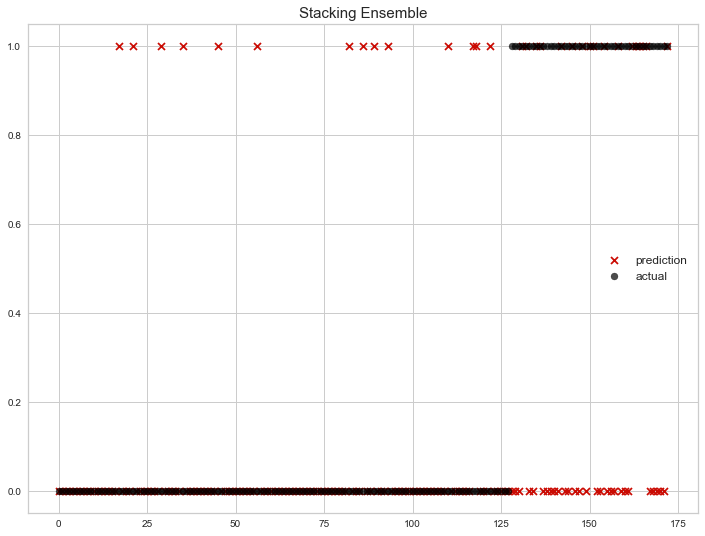

NameError: name 'my_predictions' is not defined

In [169]:
acc_eval('Stacking Ensemble', y_test, stack_pred)

In [168]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_predictions(name_, actual, pred):
    df = pd.DataFrame({'actual': y_test, 'prediction': pred})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

In [165]:
def acc_eval(name_, actual, pred):
    global predictions
    global colors

    plot_predictions(name_, actual, pred)

    mse = accuracy_score(actual, pred)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'acc'])
    print(df)
    min_ = df['acc'].min() - 10
    max_ = df['acc'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['acc'])
    
    for i, v in enumerate(df['acc']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('ACC Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()
